# Feature Exploration

Notebook to explore and catalog all features created so far in order to evaluate how to best use them

In [13]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
listings_original = pd.read_csv('Datasources/inside_airbnb/listings.csv')

In [70]:
listings = pd.read_csv('Datasources/listings_augmented/listings_augmented_2018-05-19_V6.csv',low_memory=False)
listings = listings.drop(columns='Unnamed: 0')

IMPORTANT! Data Quality Issue - Row 4325 gets split into two when augmented dataframe is created in dataprep - it's ok to just drop the two rows

In [16]:
listings = listings.drop(listings.index[4323:4325])

In [17]:
listings.shape

(5751, 598)

# Nulls Analysis

In [18]:
null_cols_orig = listings_original.columns[listings_original.isnull().any()]
null_cols = listings.columns[listings.isnull().any()]

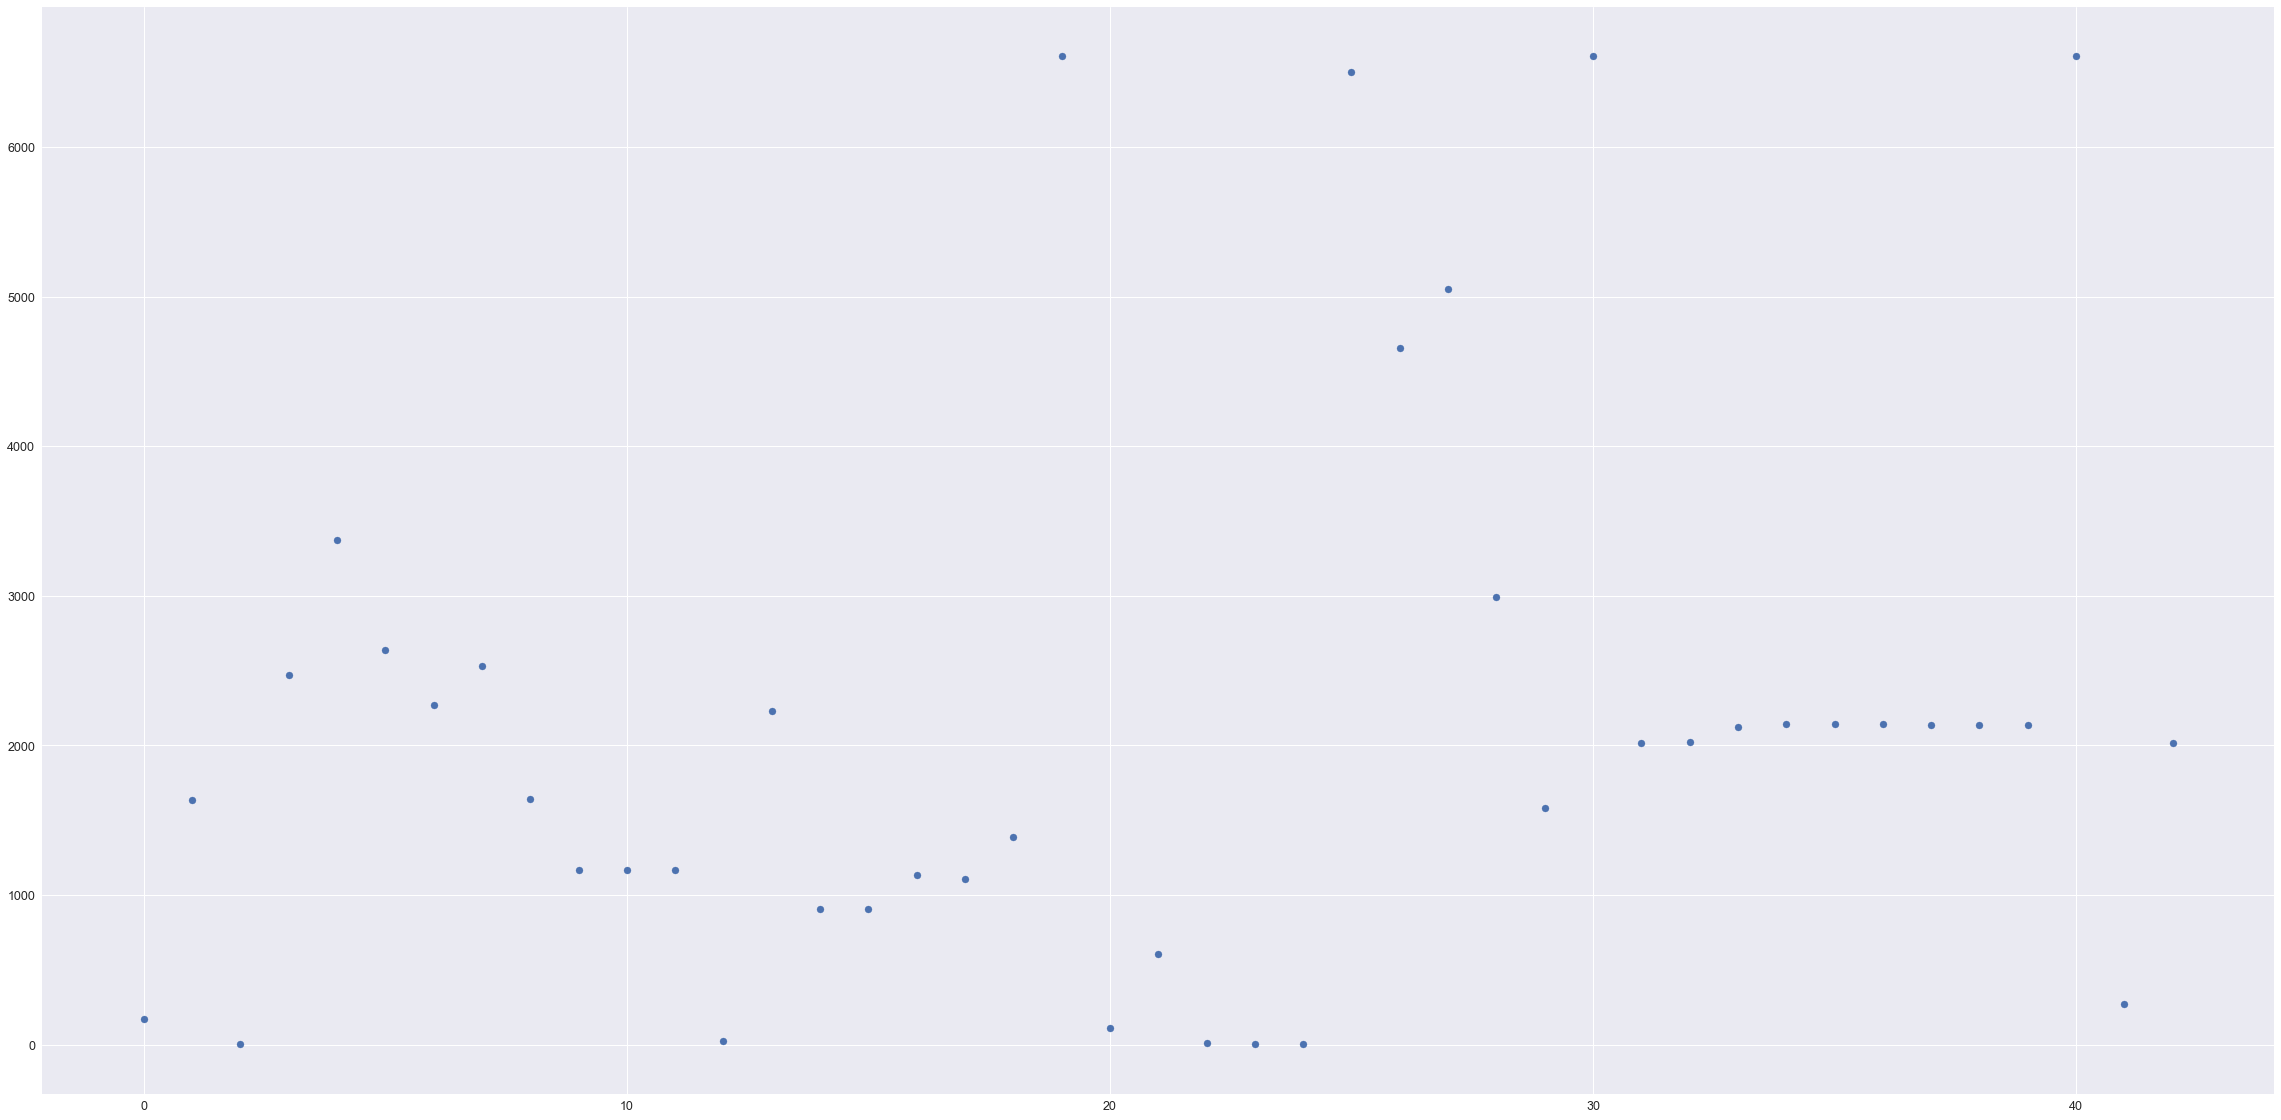

In [72]:
plt.figure(figsize=(40, 20))
plt.scatter(x=[i for i in range(len(null_cols_orig))],y=[listings_original[null_cols_orig].isnull().sum()])
#plt.xlabel([i for i in range(len(listings[listings.isnull().any(axis=1)].columns))])
plt.show()

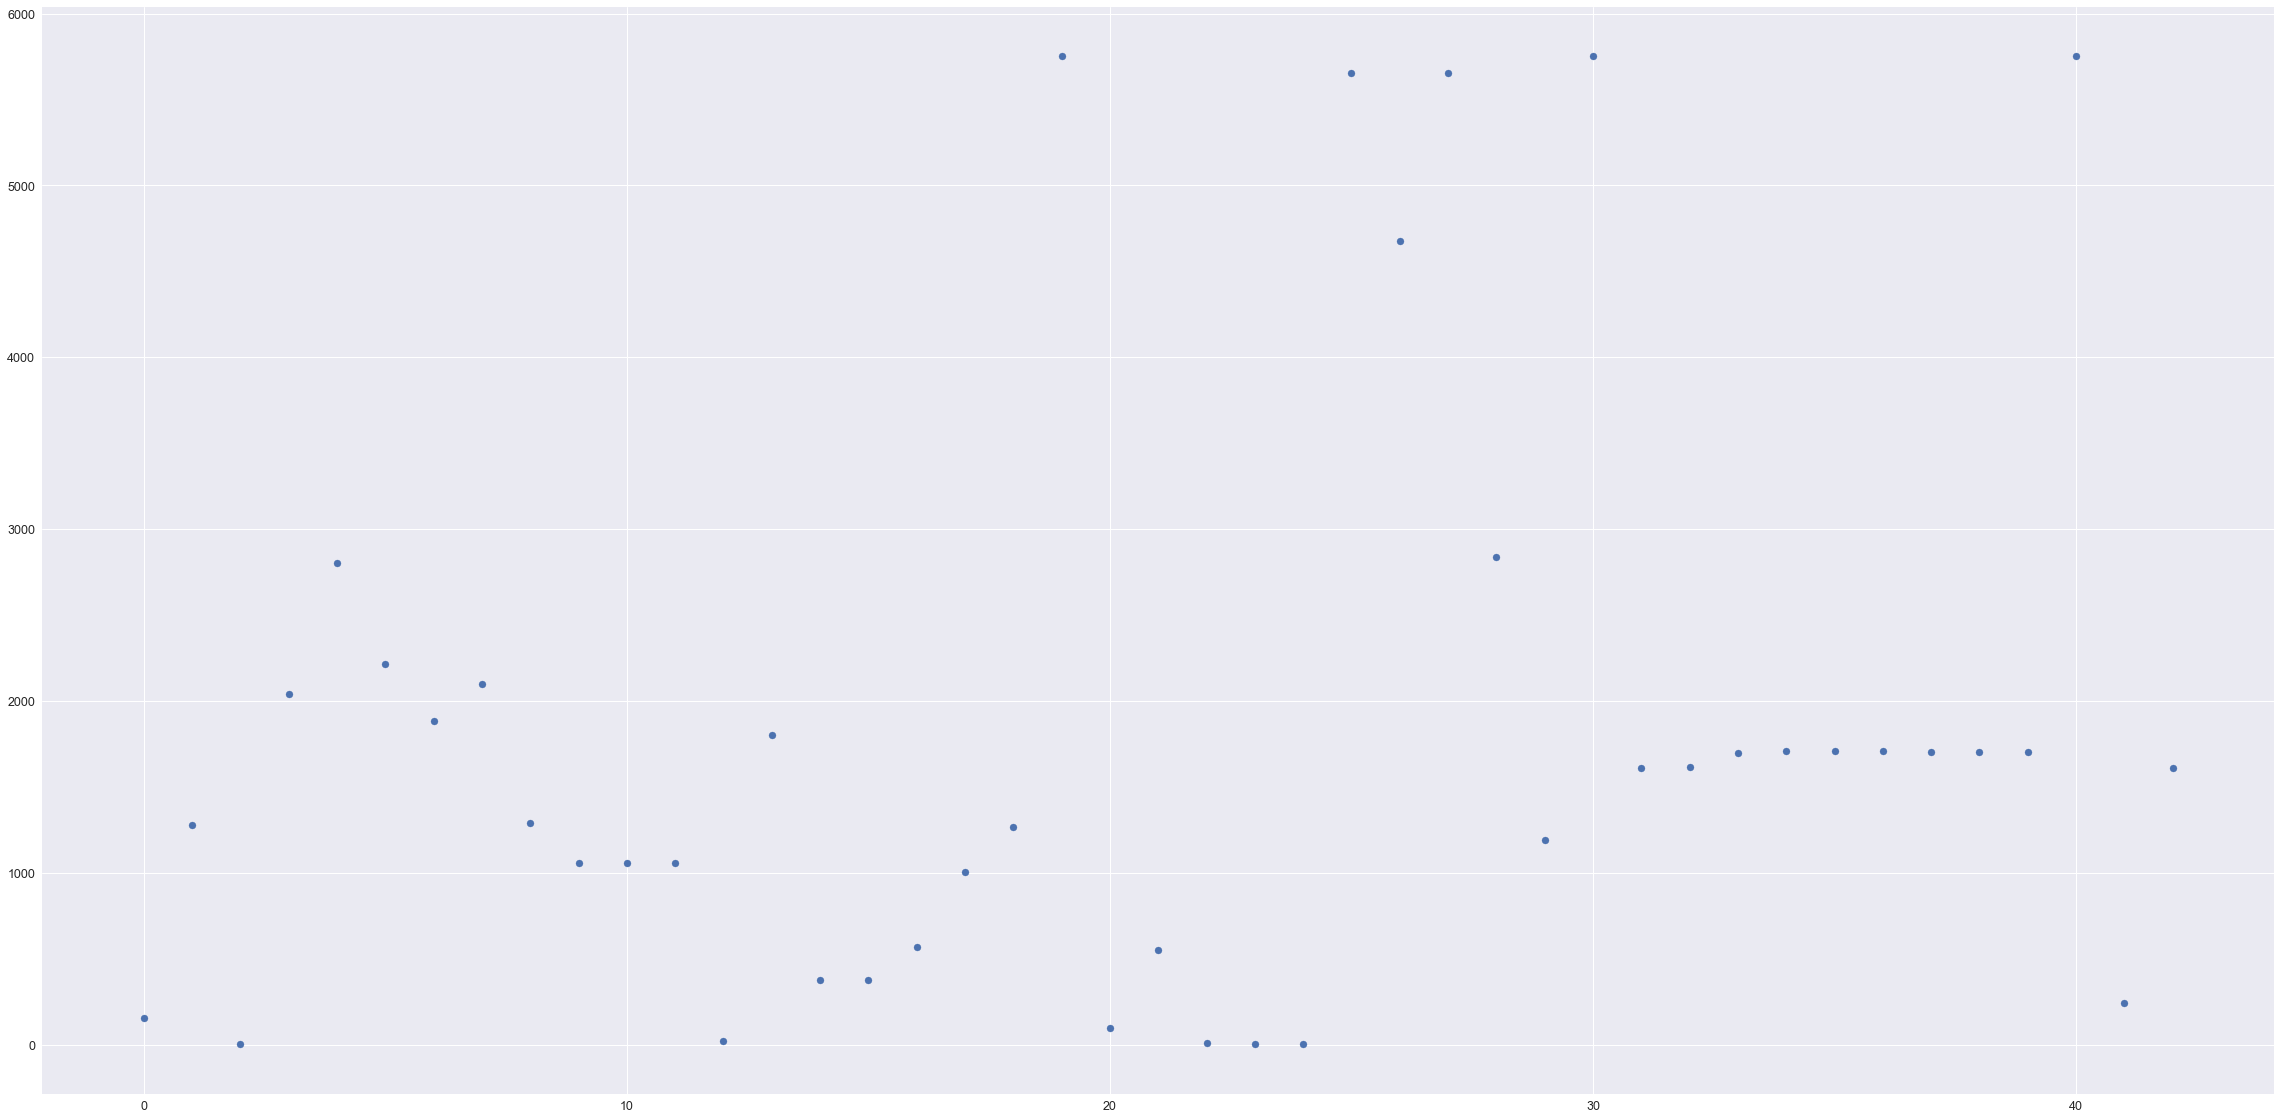

In [71]:
plt.figure(figsize=(40, 20))
plt.scatter(x=[i for i in range(len(null_cols))],y=[listings[null_cols].isnull().sum()])
#plt.xlabel([i for i in range(len(listings[listings.isnull().any(axis=1)].columns))])
plt.show()

In [82]:
listings[null_cols].isnull().sum()

summary                          157
space                           1275
description                        1
neighborhood_overview           2040
notes                           2800
transit                         2212
access                          1883
interaction                     2096
house_rules                     1292
thumbnail_url                   1057
medium_url                      1057
xl_picture_url                  1057
host_location                     18
host_about                      1804
host_response_time               378
host_response_rate               378
host_acceptance_rate             569
host_neighbourhood              1005
neighbourhood                   1268
neighbourhood_group_cleansed    5752
zipcode                           97
market                           549
bathrooms                         11
bedrooms                           4
beds                               5
square_feet                     5653
weekly_price                    4677
m

In [23]:
listings_original[null_cols_orig].isnull().sum()

summary                          173
space                           1635
description                        2
neighborhood_overview           2471
notes                           3375
transit                         2636
access                          2273
interaction                     2530
house_rules                     1642
thumbnail_url                   1166
medium_url                      1166
xl_picture_url                  1166
host_location                     24
host_about                      2228
host_response_time               910
host_response_rate               910
host_acceptance_rate            1131
host_neighbourhood              1107
neighbourhood                   1387
neighbourhood_group_cleansed    6608
zipcode                          109
market                           605
bathrooms                         11
bedrooms                           3
beds                               4
square_feet                     6503
weekly_price                    4654
m

Nulls Analysis

Features that we will not use for modeling no matter what:
thumbnail_url, medium_url, xl_picture_url, 
first_review                    2018
last_review                     2024
jurisdiction_names               273
host_location (bad data)
market (bad data)



Features that have high number of nulls and will definitely be deleted:
    neighbourhood_group_cleansed, square_feet, weekly_price, monthly_price, security_deposit, has_availability, license

Features that have significant number of nulls and might potentially be deleted: 
    Text: space, neighborhood overview, notes, transit, access, interaction, house rules, host_about, 

Features that have many nulls and we may or may not be able to impute:
host_response_time               910
host_response_rate               910
host_acceptance_rate            1131
host_neighbourhood              1107
neighbourhood                   1387
cleaning_fee                    1584
review_scores_rating            2126
review_scores_accuracy          2142
review_scores_cleanliness       2141
review_scores_checkin           2143
review_scores_communication     2139
review_scores_location          2140
review_scores_value             2140

Features that have few nulls and can be imputed easily:
summary                          173
description                        2
zipcode                          109
bathrooms                         11
bedrooms                           3
beds                               4

In [24]:
[i for i in listings.columns]

['house_rules-Topic0',
 'house_rules-Topic1',
 'house_rules-Topic2',
 'house_rules-Topic3',
 'house_rules-Topic4',
 'house_rules-Topic5',
 'house_rules-Topic6',
 'house_rules-Topic7',
 'house_rules-Topic8',
 'house_rules-Topic9',
 'house_rules-Topic10',
 'house_rules-Topic11',
 'house_rules-Topic12',
 'house_rules-Topic13',
 'house_rules-Topic14',
 'house_rules-Topic15',
 'house_rules-Topic16',
 'house_rules-Topic17',
 'house_rules-Topic18',
 'house_rules-Topic19',
 'house_rules-Dominant_Topic',
 'interaction-Topic0',
 'interaction-Topic1',
 'interaction-Topic2',
 'interaction-Topic3',
 'interaction-Topic4',
 'interaction-Topic5',
 'interaction-Topic6',
 'interaction-Topic7',
 'interaction-Topic8',
 'interaction-Topic9',
 'interaction-Topic10',
 'interaction-Topic11',
 'interaction-Topic12',
 'interaction-Topic13',
 'interaction-Topic14',
 'interaction-Topic15',
 'interaction-Topic16',
 'interaction-Topic17',
 'interaction-Topic18',
 'interaction-Topic19',
 'interaction-Dominant_Topic'

# Exploring features that have no nulls

Features that will not be used for modeling:
'id',
'listing_url',
'scrape_id',
'last_scraped',
'picture_url',
'host_id',
'host_url',
'host_name',
'experiences_offered' (has all 'none'),
host_thumbnail_url',
'host_picture_url',
'host_has_profile_pic',
'street' (already have lat, long, and other geo features)
'state',
'smart_location' (using more exact geo data)
'country_code',
'country',
'is_location_exact',
'bed_type',
'extra_prople',
'maximum_nights',
'calendar_last_scraped',
'require_guest_profile_picture',
'require_guest_phone_verification'

Features that contain potentially useful info:
    name (contains listing headline) - a text column
    

Features we will use in transformed form:
    amenities, host_verifications,
    

Exploring the features Visually:

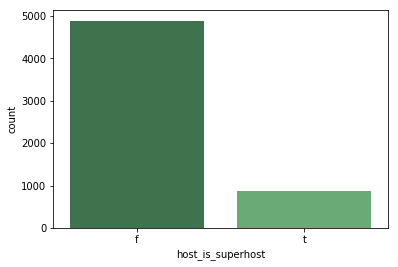

In [26]:
sb.countplot(x="host_is_superhost", data=listings, palette="Greens_d");

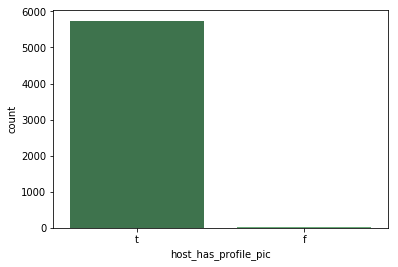

In [27]:
sb.countplot(x="host_has_profile_pic", data=listings, palette="Greens_d");

Insight: probably useless to use host_has_profile_pic

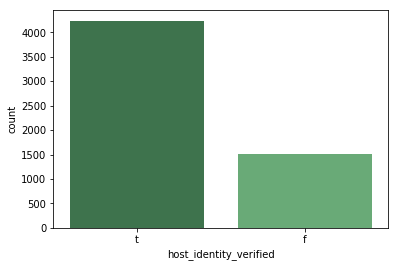

In [28]:
sb.countplot(x="host_identity_verified", data=listings, palette="Greens_d");

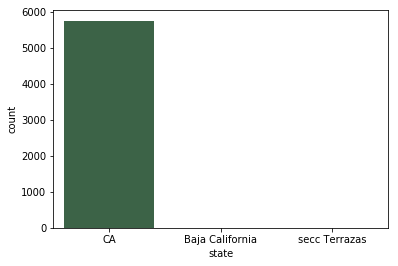

In [29]:
sb.countplot(x="state", data=listings, palette="Greens_d");

Insight: will not use state

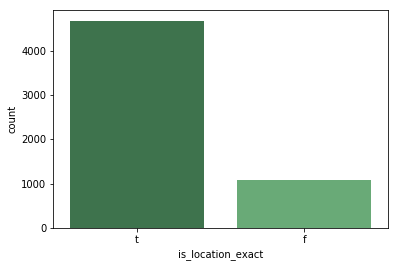

In [30]:
sb.countplot(x="is_location_exact", data=listings, palette="Greens_d");

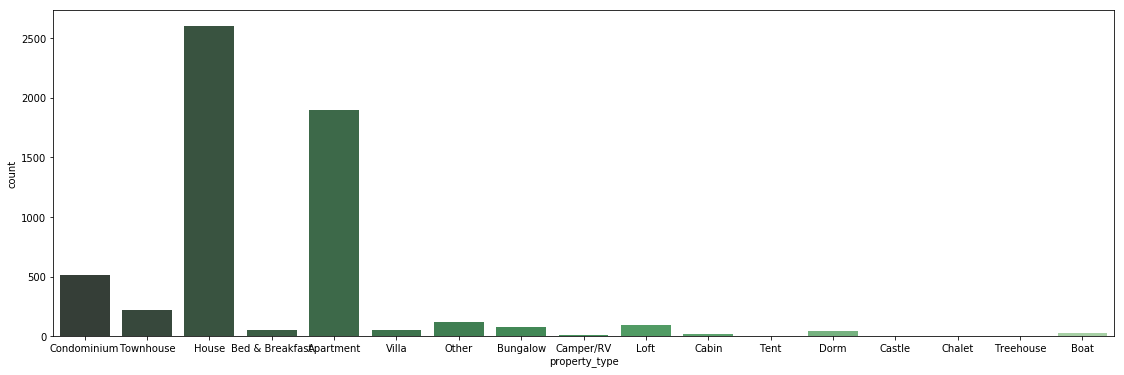

In [31]:
fig, ax = plt.subplots(figsize=(19,6))
sb.countplot(ax=ax,x="property_type", data=listings, palette="Greens_d");

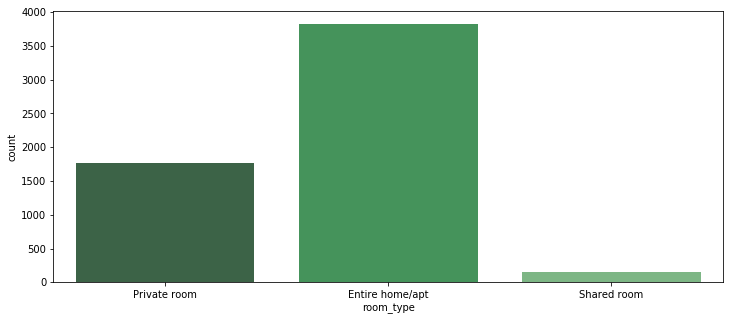

In [32]:
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="room_type", data=listings, palette="Greens_d");

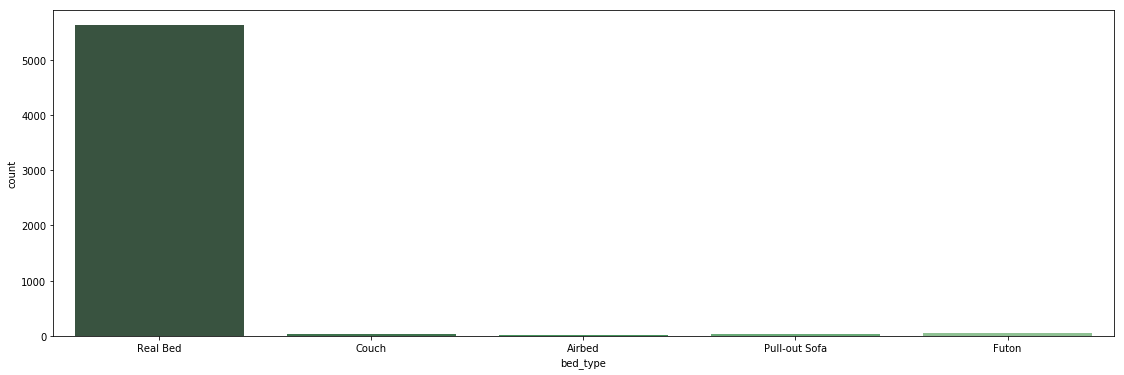

In [33]:
fig, ax = plt.subplots(figsize=(19,6))
sb.countplot(ax=ax,x="bed_type", data=listings, palette="Greens_d");

Insight: will not use bed type

Plotting Features Related to Listing Size

In [34]:
cols = ['accommodates','bathrooms', 'bedrooms', 'beds']

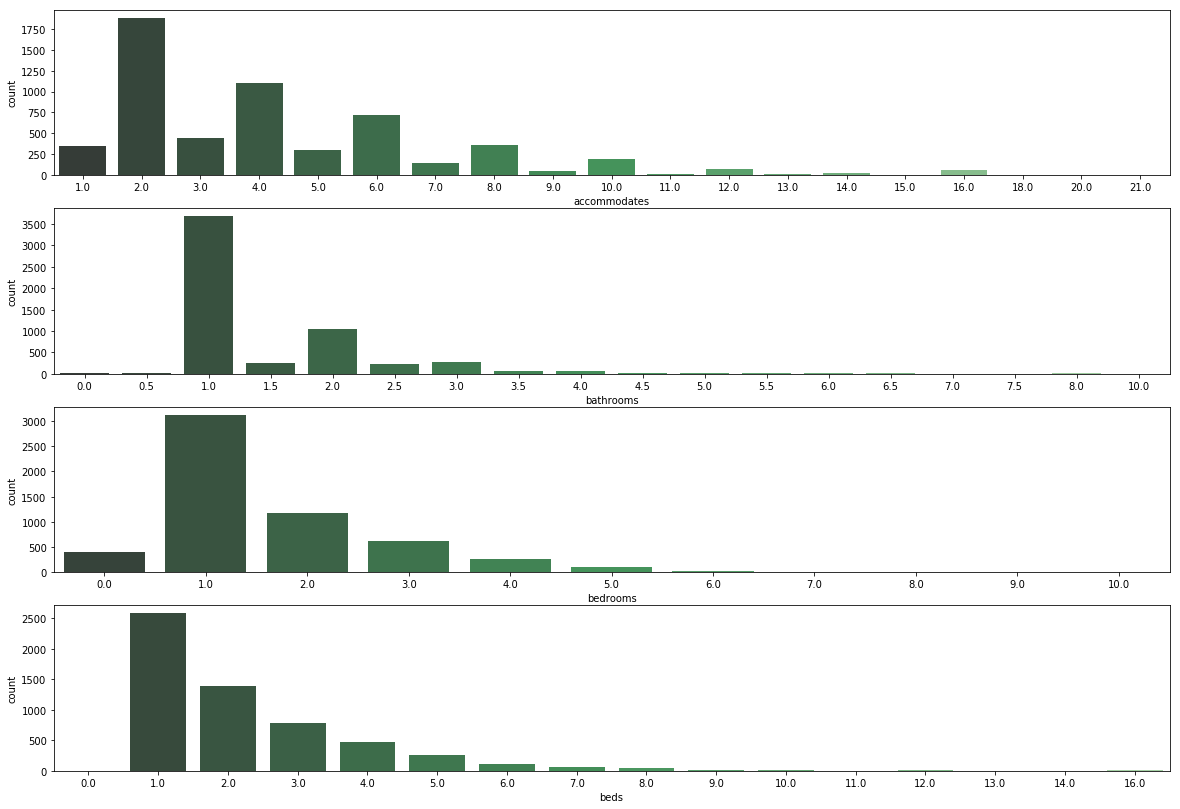

In [35]:
fig, axes = plt.subplots(nrows = len(cols), ncols = 1, sharex = False, sharey= False, figsize = (20,14))
for i,val in enumerate(cols):
    sb.countplot(ax=axes[i],x=val, data=listings, palette="Greens_d");

In [38]:
corrmx = listings.corr()

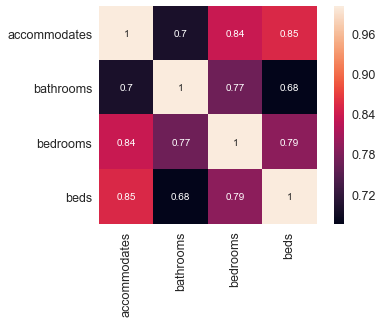

In [39]:
temp = listings.copy()
temp = temp.fillna(temp.mean())
cm = np.corrcoef(temp[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size':10}, yticklabels=cols, xticklabels=cols)
plt.show()

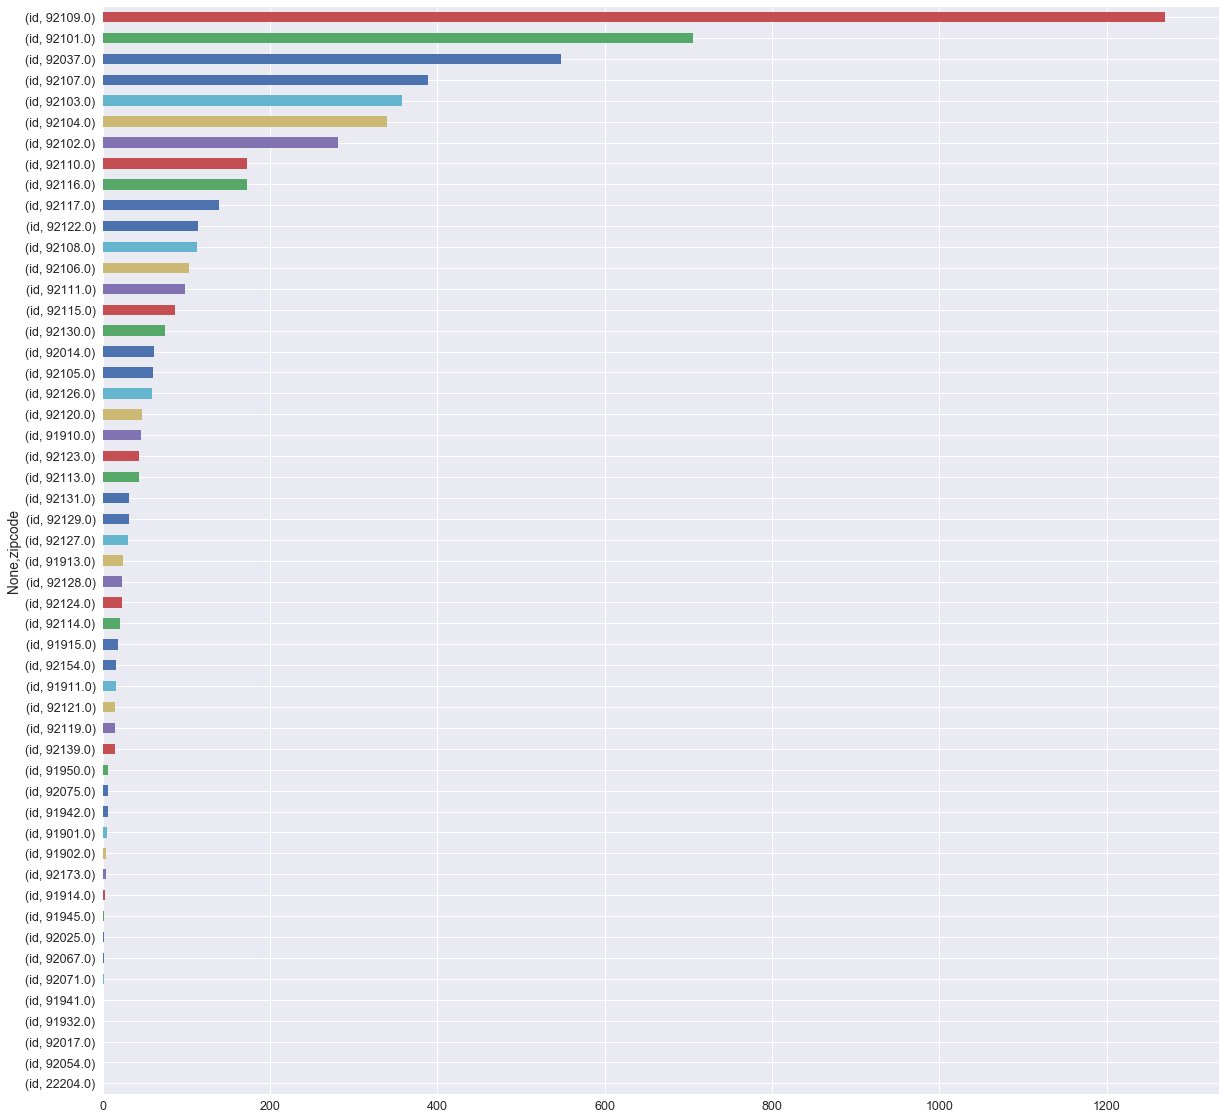

In [40]:
temp = listings.copy()
temp['zipcode'] = temp['zipcode'].astype(float)
nghbrd_list_count = temp[['zipcode','id']].groupby(['zipcode'])

plt.figure()
nghbrd_list_count.count().sort_values(by='id').unstack().plot(kind='barh', figsize=(20,20))
plt.show()

Amenities Visualization 

In [74]:
has = listings.filter(regex='has')
has = has.drop(columns=['host_has_profile_pic', 'has_availability', 'host_has_profile_pic_bin'])

In [75]:
has_df = pd.DataFrame(has.sum(), columns=['Sum'])
has_df = has_df.sort_values(by='Sum')

In [76]:
has_df['Amenity'] = has_df.index

In [77]:
has_df['Amenity'] = has_df['Amenity'].astype(str)

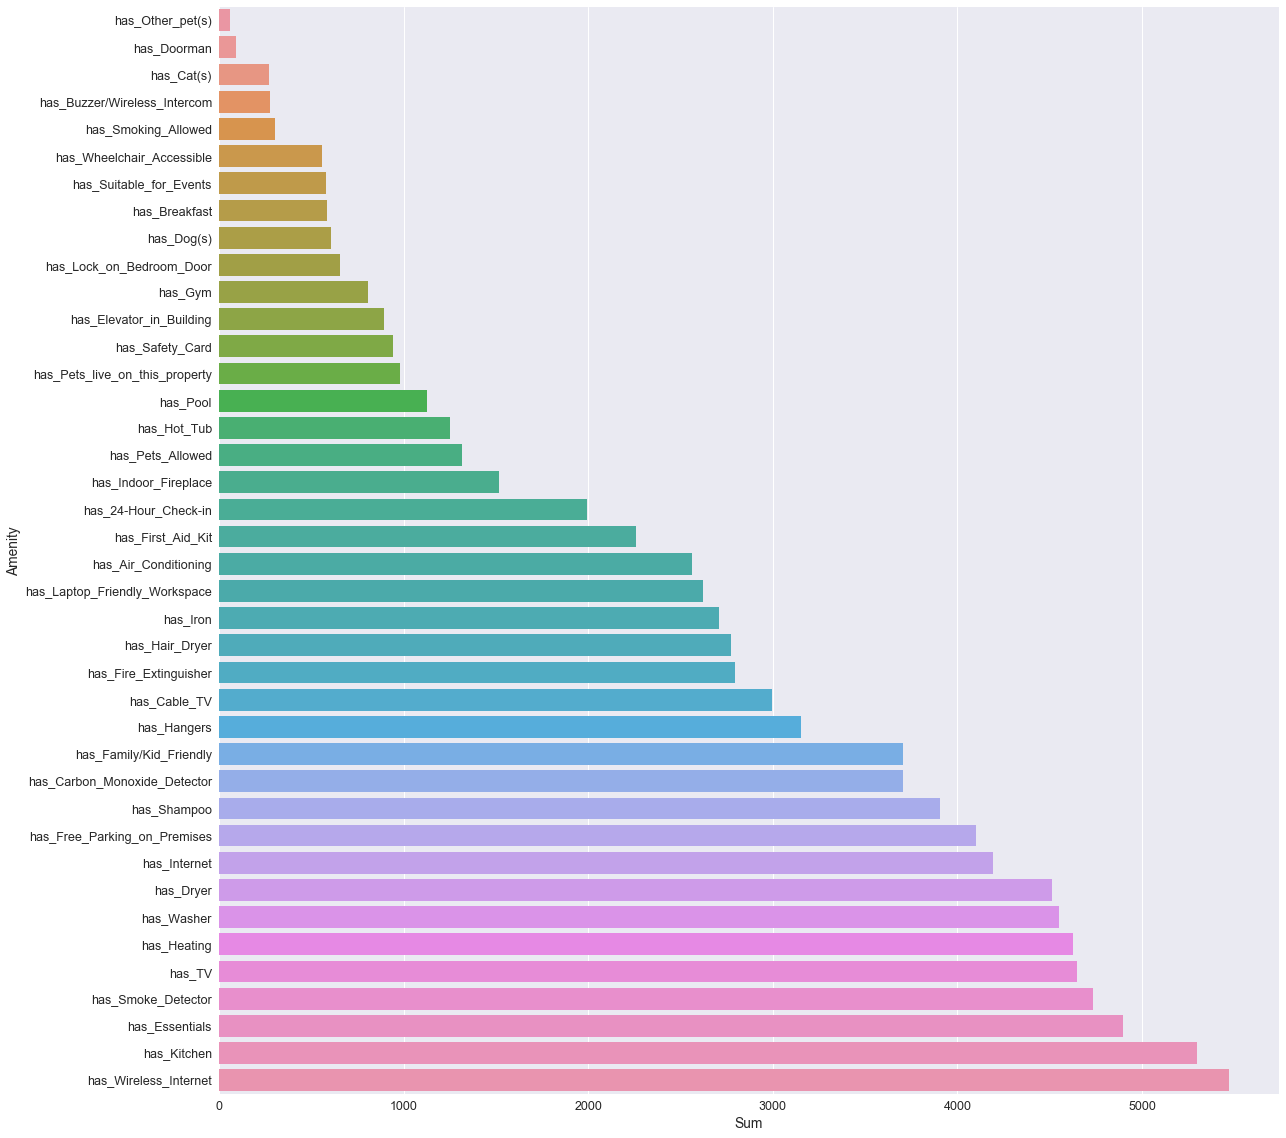

In [78]:
fig, ax = plt.subplots(figsize=(19,20))
sb.barplot(ax = ax, y=has_df['Amenity'], x=has_df['Sum'], data=has_df);

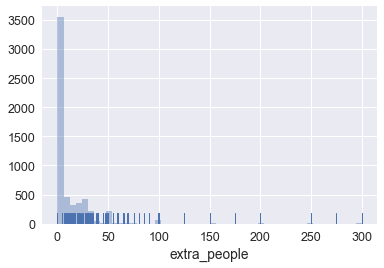

In [53]:
sb.distplot(listings['extra_people'], kde=False, rug=True)

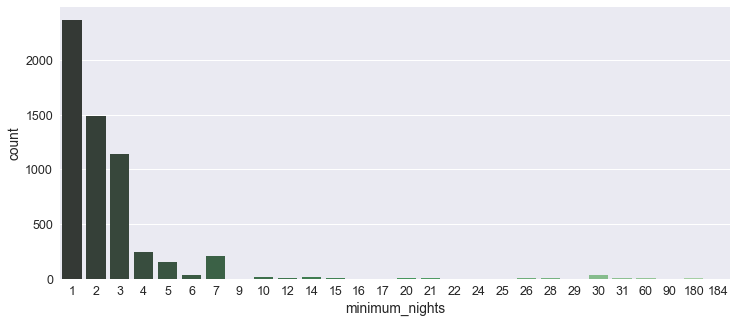

In [59]:
temp = pd.DataFrame(listings['minimum_nights'].astype(int))
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="minimum_nights", data=temp, palette="Greens_d");

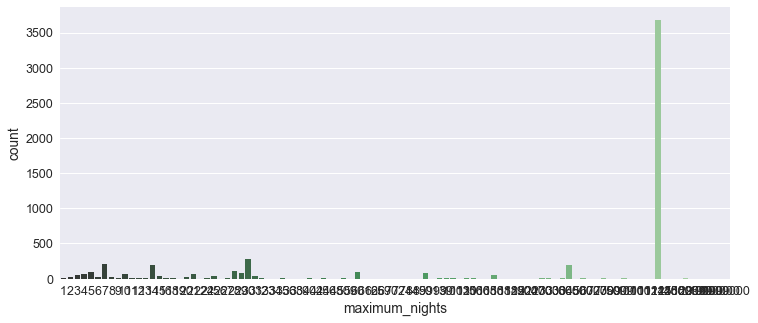

In [62]:
temp = pd.DataFrame(listings['maximum_nights'].astype(int))
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="maximum_nights", data=temp, palette="Greens_d");

Insight: min nights could be helpful, max nights no

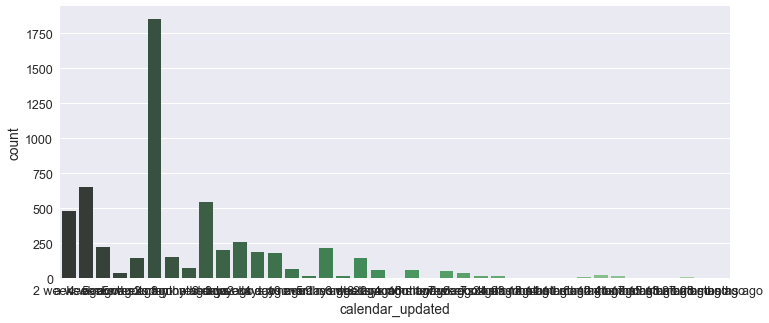

In [56]:
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="calendar_updated", data=listings, palette="Greens_d");

In [63]:
listings.calendar_updated.unique()

array(['2 weeks ago', 'a week ago', '4 weeks ago', '5 months ago',
       '5 weeks ago', 'today', '2 months ago', '3 months ago',
       'yesterday', '3 days ago', '3 weeks ago', '2 days ago',
       '4 days ago', 'never', '10 months ago', '5 days ago',
       '9 months ago', '6 weeks ago', '6 days ago', '22 months ago',
       '4 months ago', '16 months ago', '1 week ago', '7 weeks ago',
       '8 months ago', '7 months ago', '24 months ago', '23 months ago',
       '18 months ago', '14 months ago', '11 months ago', '6 months ago',
       '12 months ago', '41 months ago', '17 months ago', '15 months ago',
       '13 months ago', '27 months ago', '28 months ago'], dtype=object)

Insight: will transform feature into a numerical feature (pending Sankarshan)

In [64]:
av_cols = ['availability_30', 'availability_60', 'availability_90', 'availability_365']

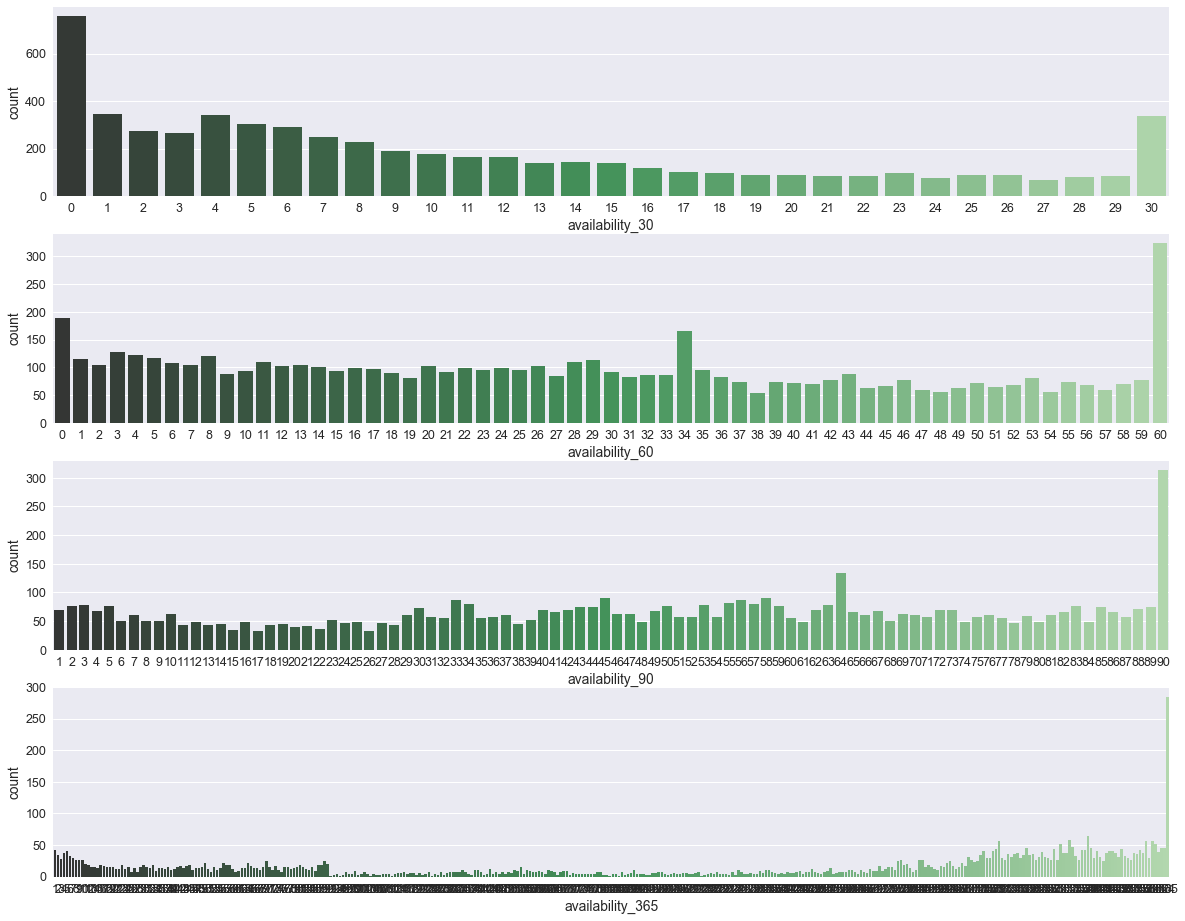

In [68]:
temp = listings[av_cols].astype(int)
fig, axes = plt.subplots(nrows = len(av_cols), ncols = 1, sharex = False, sharey= False, figsize = (20,16))
for i,val in enumerate(av_cols):
    sb.countplot(ax=axes[i],x=val, data=temp, palette="Greens_d");

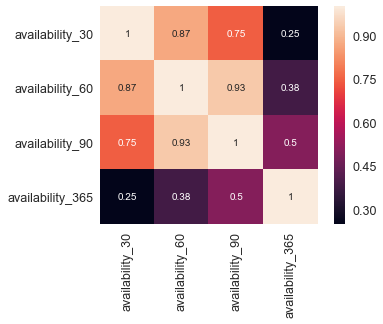

In [69]:
temp = listings.copy()
temp = temp.fillna(temp.mean())
cm = np.corrcoef(temp[av_cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size':10}, yticklabels=av_cols, xticklabels=av_cols)
plt.show()

Insight: will keep all 4 but will eventually end up using one of the 4 as they are highly correlated, probably availability_30

In [81]:
listings['number_of_reviews'].isnull().sum()

2

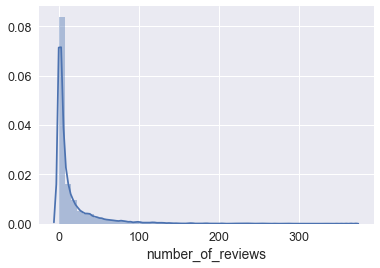

In [90]:
temp = pd.DataFrame(listings['number_of_reviews'].astype(float))
temp['number_of_reviews'] = temp['number_of_reviews'].replace([np.inf, -np.inf], np.nan)
sb.distplot(temp['number_of_reviews'].fillna(temp['number_of_reviews'].mean()))

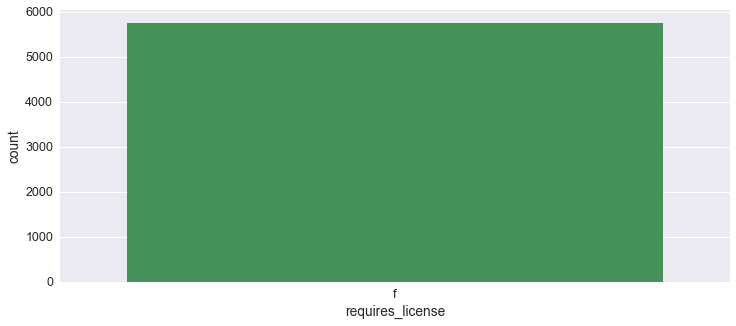

In [95]:
temp = pd.DataFrame(listings['requires_license'])
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="requires_license", data=temp, palette="Greens_d");

Insight: all false so will discard this variable

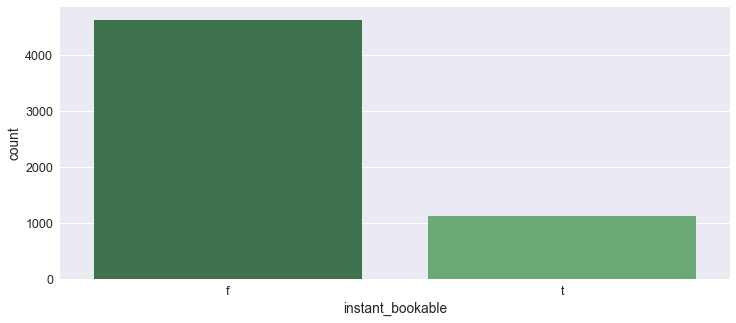

In [96]:
temp = pd.DataFrame(listings['instant_bookable'])
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="instant_bookable", data=temp, palette="Greens_d");

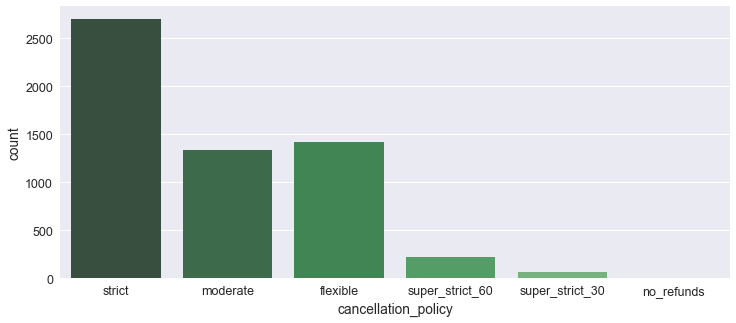

In [97]:
temp = pd.DataFrame(listings['cancellation_policy'])
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="cancellation_policy", data=temp, palette="Greens_d");

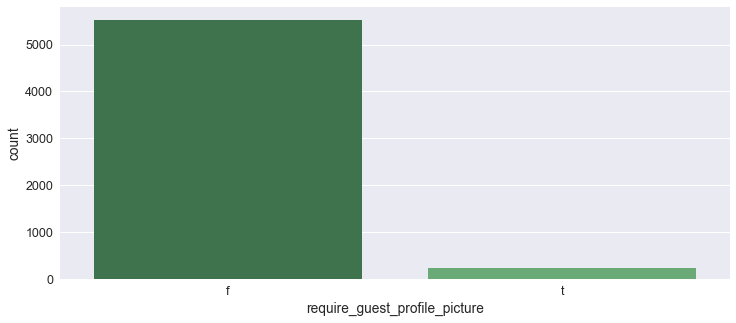

In [98]:
temp = pd.DataFrame(listings['require_guest_profile_picture'])
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="require_guest_profile_picture", data=temp, palette="Greens_d");

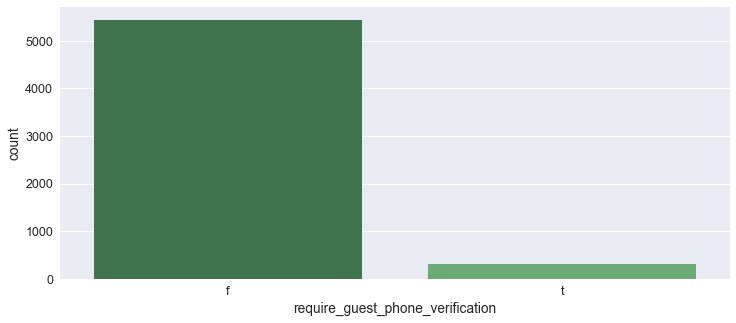

In [99]:
temp = pd.DataFrame(listings['require_guest_phone_verification'])
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="require_guest_phone_verification", data=temp, palette="Greens_d");

Insight: will discard the above two vars

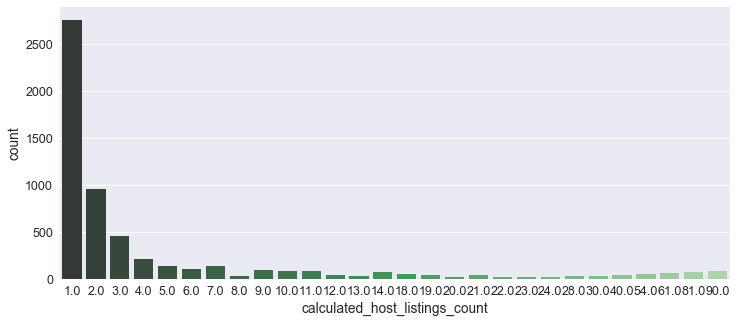

In [106]:
temp = pd.DataFrame(listings['calculated_host_listings_count'])
temp['calculated_host_listings_count'] = temp['calculated_host_listings_count'].replace([np.inf, -np.inf], np.nan)
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="calculated_host_listings_count", data=temp, palette="Greens_d");

In [110]:
listings[['max_price',
 'median_price',
 'min_price',
 'price_y',
 'skew_of_price',
 'stdev_of_price']]

max_price  median_price   min_price     price_y  skew_of_price  \
0          59.0          59.0   59.000000   59.000000       1.930178   
1         120.0         120.0  120.000000  120.000000       1.930178   
2          80.0          70.0   70.000000   72.903226       1.930178   
3          80.0          70.0   70.000000   72.641509       1.930178   
4          90.0          90.0   90.000000   90.000000       1.930178   
5         150.0         150.0  150.000000  150.000000       1.930178   
6          90.0          90.0   90.000000   90.000000       1.930178   
7         342.0         248.0  214.000000  237.891892       1.930178   
8         110.0         110.0  110.000000  110.000000       1.930178   
9         300.0         300.0  300.000000  300.000000       1.930178   
10         95.0          45.0   45.000000   50.529412       1.930178   
11         50.0          40.0   35.000000   39.701493       1.930178   
12         60.0          45.0   45.000000   50.245902       1.930178   
13         70.0          60.0   60.000000   62.727273       1.930178   
14        500.0         450.0  450.000000  463.333333       1.930178   
15        280.0         240.0  200.000000  227.924528       1.930178   
16        450.0         270.0  265.000000  286.627907       1.930178   
17        450.0         320.0  320.000000  336.944444       1.930178   
18         65.0          65.0   45.000000   59.666667       1.930178   
19         40.0          40.0   40.000000   40.000000       1.930178   
20        155.0          75.0   75.000000   80.450549       1.930178   
21         70.0          46.0   46.000000   46.947368       1.930178   
22         66.0          58.0   48.000000   58.342857       1.930178   
23         82.0          75.0   75.000000   75.142857       1.930178   
24         40.0          40.0   40.000000   40.000000       1.930178   
25         89.0          79.0   79.000000   81.727273       1.930178   
26         45.0          45.0   45.000000   45.000000       1.930178   
27         89.0          59.0   59.000000   61.413793       1.930178   
28         50.0          41.0   40.000000   41.625000       1.930178   
29         69.0          59.0   59.000000   61.777778       1.930178   
...         ...           ...         ...         ...            ...   
5723       90.0          90.0   90.000000   90.000000       1.930178   
5724      450.0         299.0  299.000000  337.967742       1.930178   
5725      149.0         149.0  149.000000  149.000000       1.930178   
5726      385.0         385.0  385.000000  385.000000       1.930178   
5727       50.0          39.0   37.000000   41.161290       1.930178   
5728       80.0          60.0   60.000000   65.789474       1.930178   
5729      145.0          98.0   55.000000   98.858974       1.930178   
5730       81.0          79.0   77.000000   78.915493       1.930178   
5731       45.0          45.0   45.000000   45.000000       1.930178   
5732       75.0          75.0   75.000000   75.000000       1.930178   
5733      109.0          98.0   90.000000   97.966102       1.930178   
5734      250.0         225.0  225.000000  236.666667       1.930178   
5735      104.0          96.0   87.000000   96.488889       1.930178   
5736       50.0          40.0   40.000000   44.200000       1.930178   
5737       25.0          25.0   25.000000   25.000000       1.930178   
5738      375.0         300.0  275.000000  306.645570       1.930178   
5739      125.0          99.0   75.000000  102.123596       1.930178   
5740      900.0         875.0  196.467288  708.086474       1.930178   
5741       98.0          98.0   98.000000   98.000000       1.930178   
5742      167.0         150.0  150.000000  150.661017       1.930178   
5743      150.0         150.0  150.000000  150.000000       1.930178   
5744      269.0         199.0  199.000000  213.000000       1.930178   
5745      128.0          95.0   75.000000   96.416667       1.930178   
5746       50.0          40.0   40.000000   43

In [107]:
listings[['hol_max_price',
'hol_median_price',
'hol_min_price',
'hol_price',
'hol_skew_of_price',
'hol_stdev_of_price']]

hol_max_price  hol_median_price  hol_min_price  hol_price  \
0              59.0              59.0           59.0       59.0   
1             120.0             120.0          120.0      120.0   
2              70.0              70.0           70.0       70.0   
3              70.0              70.0           70.0       70.0   
4              90.0              90.0           90.0       90.0   
5             150.0             150.0          150.0      150.0   
6              90.0              90.0           90.0       90.0   
7               0.0               0.0            0.0        0.0   
8             110.0             110.0          110.0      110.0   
9             300.0             300.0          300.0      300.0   
10             45.0              45.0           45.0       45.0   
11             35.0              35.0           35.0       35.0   
12             45.0              45.0           45.0       45.0   
13             60.0              60.0           60.0       60.0   
14            450.0             450.0          450.0      450.0   
15            240.0             240.0          240.0      240.0   
16            265.0             265.0          265.0      265.0   
17            320.0             320.0          320.0      320.0   
18             55.0              55.0           55.0       55.0   
19             40.0              40.0           40.0       40.0   
20             75.0              75.0           75.0       75.0   
21             46.0              46.0           46.0       46.0   
22             58.0              58.0           58.0       58.0   
23             75.0              75.0           75.0       75.0   
24             40.0              40.0           40.0       40.0   
25             79.0              79.0           79.0       79.0   
26             45.0              45.0           45.0       45.0   
27             59.0              59.0           59.0       59.0   
28             40.0              40.0           40.0       40.0   
29             59.0              59.0           59.0       59.0   
...             ...               ...            ...        ...   
5723            0.0               0.0            0.0        0.0   
5724          299.0             299.0          299.0      299.0   
5725            0.0               0.0            0.0        0.0   
5726          385.0             385.0          385.0      385.0   
5727            0.0               0.0            0.0        0.0   
5728           60.0              60.0           60.0       60.0   
5729           98.0              98.0           98.0       98.0   
5730           81.0              81.0           81.0       81.0   
5731           45.0              45.0           45.0       45.0   
5732           75.0              75.0           75.0       75.0   
5733           90.0              90.0           90.0       90.0   
5734            0.0               0.0            0.0        0.0   
5735           96.0              96.0           96.0       96.0   
5736            0.0               0.0            0.0        0.0   
5737           25.0              25.0           25.0       25.0   
5738          300.0             300.0          300.0      300.0   
5739           75.0              75.0           75.0       75.0   
5740          500.0             500.0          500.0      500.0   
5741           98.0              98.0           98.0       98.0   
5742          150.0             150.0          150.0      150.0   
5743          150.0             150.0          150.0      150.0   
5744          199.0             199.0          199.0      199.0   
5745           80.0              80.0           80.0       80.0   
5746            0.0               0.0            0.0        0.0   
5747           40.0              40.0           40.0       40.0   
5748            0.0               0.0            0.0        0.0   
5749           20.0              20.0           20.0       20.0   
5750            0.0               0.0            0.0 

In [108]:
listings[['wke_max_price',
'wke_median_price',
'wke_min_price',
'wke_price',
'wke_skew_of_price',
'wke_stdev_of_price',]]

wke_max_price  wke_median_price  wke_min_price   wke_price  \
0              59.0              59.0      59.000000   59.000000   
1             120.0             120.0     120.000000  120.000000   
2              80.0              75.0      70.000000   75.000000   
3              80.0              70.0      70.000000   74.666667   
4              90.0              90.0      90.000000   90.000000   
5             150.0             150.0     150.000000  150.000000   
6              90.0              90.0      90.000000   90.000000   
7             342.0             248.0     214.000000  252.200000   
8             110.0             110.0     110.000000  110.000000   
9             300.0             300.0     300.000000  300.000000   
10             95.0              45.0      45.000000   51.086957   
11             50.0              40.0      35.000000   41.388889   
12             60.0              45.0      45.000000   50.294118   
13             70.0              65.0      60.000000   65.000000   
14            500.0             450.0     450.000000  473.529412   
15            280.0             240.0     200.000000  235.714286   
16            450.0             270.0     265.000000  284.583333   
17            450.0             340.0     320.000000  343.000000   
18             65.0              65.0      45.000000   59.090909   
19             40.0              40.0      40.000000   40.000000   
20            155.0              79.0      75.000000   83.000000   
21             46.0              46.0      46.000000   46.000000   
22             66.0              61.0      48.000000   60.550000   
23             82.0              75.0      75.000000   75.269231   
24             40.0              40.0      40.000000   40.000000   
25             89.0              79.0      79.000000   83.800000   
26             45.0              45.0      45.000000   45.000000   
27             89.0              59.0      59.000000   61.500000   
28             50.0              43.0      40.000000   42.642857   
29             69.0              59.0      59.000000   63.800000   
...             ...               ...            ...         ...   
5723           90.0              90.0      90.000000   90.000000   
5724          450.0             450.0     299.000000  378.941176   
5725          149.0             149.0     149.000000  149.000000   
5726          385.0             385.0     385.000000  385.000000   
5727           48.0              43.5      38.000000   43.125000   
5728           80.0              80.0      60.000000   70.476190   
5729          145.0              98.0      55.000000   98.363636   
5730           81.0              79.0      77.000000   79.000000   
5731           45.0              45.0      45.000000   45.000000   
5732           75.0              75.0      75.000000   75.000000   
5733          109.0             101.0      91.000000  101.555556   
5734          250.0             237.5     225.000000  237.500000   
5735          104.0              99.0      87.000000   99.000000   
5736           50.0              50.0      40.000000   49.333333   
5737           25.0              25.0      25.000000   25.000000   
5738          325.0             300.0     275.000000  310.227273   
5739          125.0              99.0      75.000000  103.384615   
5740          900.0             875.0     196.467288  719.920561   
5741           98.0              98.0      98.000000   98.000000   
5742          167.0             150.0     150.000000  151.222222   
5743          150.0             150.0     150.000000  150.000000   
5744          269.0             199.0     199.000000  230.818182   
5745          128.0              97.0      79.000000  100.150000   
5746           50.0              50.0      40.000000   45.384615   
5747           44.0              40.0      40.000000   40.153846   
5748          300.0             300.0     200.000000  266.666667   
5749           20.0              20.0      20.000000   20.0000

In [109]:
listings[[
'wkd_max_price',
'wkd_median_price',
'wkd_min_price',
'wkd_price',
'wkd_skew_of_price',
'wkd_stdev_of_price',]]

wkd_max_price  wkd_median_price  wkd_min_price   wkd_price  \
0              59.0              59.0      59.000000   59.000000   
1             120.0             120.0     120.000000  120.000000   
2              80.0              70.0      70.000000   72.903226   
3              80.0              70.0      70.000000   72.641509   
4              90.0              90.0      90.000000   90.000000   
5             150.0             150.0     150.000000  150.000000   
6              90.0              90.0      90.000000   90.000000   
7             342.0             248.0     214.000000  237.891892   
8             110.0             110.0     110.000000  110.000000   
9             300.0             300.0     300.000000  300.000000   
10             95.0              45.0      45.000000   50.529412   
11             50.0              40.0      35.000000   39.701493   
12             60.0              45.0      45.000000   50.245902   
13             70.0              60.0      60.000000   62.727273   
14            500.0             450.0     450.000000  463.333333   
15            280.0             240.0     200.000000  227.924528   
16            450.0             270.0     265.000000  286.627907   
17            450.0             320.0     320.000000  336.944444   
18             65.0              65.0      45.000000   59.666667   
19             40.0              40.0      40.000000   40.000000   
20            155.0              75.0      75.000000   80.450549   
21             70.0              46.0      46.000000   46.947368   
22             66.0              58.0      48.000000   58.342857   
23             82.0              75.0      75.000000   75.142857   
24             40.0              40.0      40.000000   40.000000   
25             89.0              79.0      79.000000   81.727273   
26             45.0              45.0      45.000000   45.000000   
27             89.0              59.0      59.000000   61.413793   
28             50.0              41.0      40.000000   41.625000   
29             69.0              59.0      59.000000   61.777778   
...             ...               ...            ...         ...   
5723           90.0              90.0      90.000000   90.000000   
5724          450.0             299.0     299.000000  337.967742   
5725          149.0             149.0     149.000000  149.000000   
5726          385.0             385.0     385.000000  385.000000   
5727           50.0              39.0      37.000000   41.161290   
5728           80.0              60.0      60.000000   65.789474   
5729          145.0              98.0      55.000000   98.858974   
5730           81.0              79.0      77.000000   78.915493   
5731           45.0              45.0      45.000000   45.000000   
5732           75.0              75.0      75.000000   75.000000   
5733          109.0              98.0      90.000000   97.966102   
5734          250.0             225.0     225.000000  236.666667   
5735          104.0              96.0      87.000000   96.488889   
5736           50.0              40.0      40.000000   44.200000   
5737           25.0              25.0      25.000000   25.000000   
5738          375.0             300.0     275.000000  306.645570   
5739          125.0              99.0      75.000000  102.123596   
5740          900.0             875.0     196.467288  708.086474   
5741           98.0              98.0      98.000000   98.000000   
5742          167.0             150.0     150.000000  150.661017   
5743          150.0             150.0     150.000000  150.000000   
5744          269.0             199.0     199.000000  213.000000   
5745          128.0              95.0      75.000000   96.416667   
5746           50.0              40.0      40.000000   43.333333   
5747           44.0              40.0      40.000000   40.054945   
5748          350.0             300.0     200.000000  276.315789   
5749           20.0              20.0      20.000000   20.0000

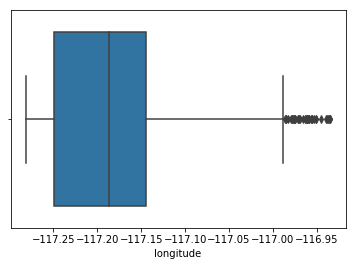

In [71]:
ax = sb.boxplot(x="longitude", data=listings_original)

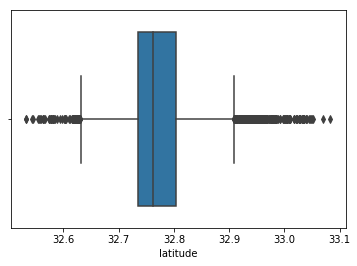

In [72]:
ax = sb.boxplot(x="latitude", data=listings_original)

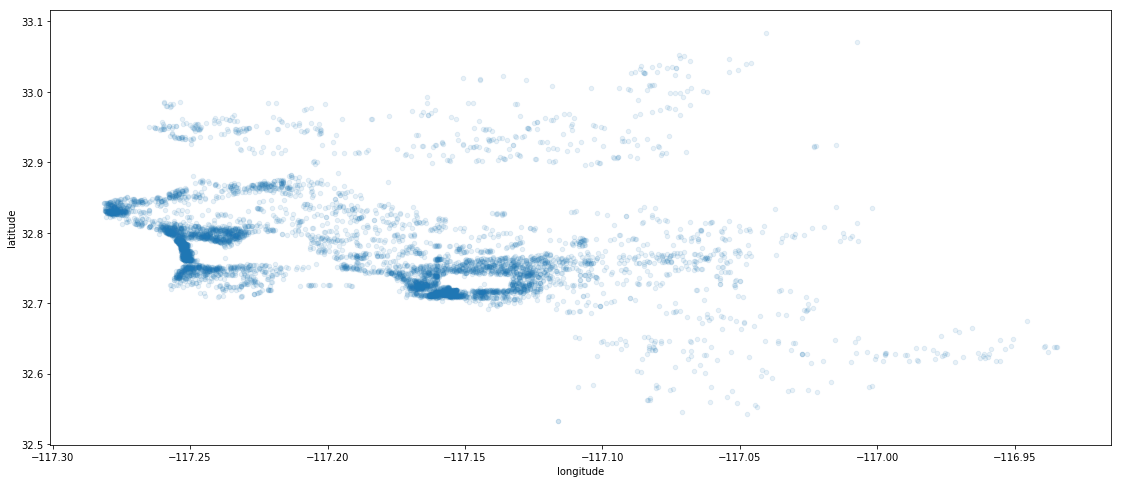

In [82]:
fig, ax = plt.subplots(figsize=(19,8))
listings_original.plot(ax=ax,kind='scatter',x='longitude',y='latitude', alpha=0.1)

In [ ]:
fig, ax = plt.subplots(figsize=(19,6))
sb.countplot(ax=ax,x="property_type", data=listings_original, palette="Greens_d");

Price Variable (Target Var)

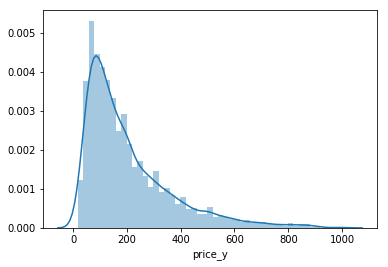

In [98]:
sb.distplot(listings['price_y'])

Now plotting transformations of price 

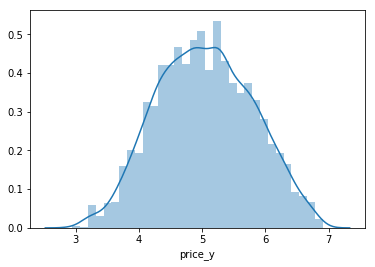

In [100]:
sb.distplot(np.log(listings['price_y']))

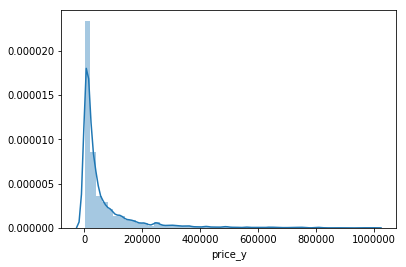

In [102]:
sb.distplot(listings['price_y']**2)

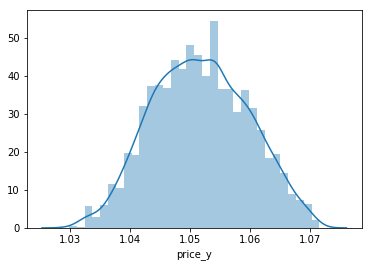

In [112]:
sb.distplot(listings['price_y']**(0.01))

In [ ]:
'host_listings_count',
'host_total_listings_count',